#### Load log soak_test

In [36]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [37]:
# Ler o arquivo de log como um DataFrame do pandas
#log_file1 = 'logs/system_monitor_cca_embedded_model_during_6_hours.log'
#log_file1 = 'logs/system_monitor_deep_embedded_model_during_6_hours.log'
log_file1 = 'system_monitor_deep_conv1D_raw_embedded_model_during_1_hours.log'
log_data1 = pd.read_csv(log_file1, sep='|', names=['CPU Usage','Temperature', 'Memory', 'Used Disk Space','Preprocessing Latency', 'Model Predict Latency', 'Model accuracy'], engine='python')

log_file2 = 'system_monitor_deep_embedded_model_2D_during_1_hours.log'
log_data2= pd.read_csv(log_file2, sep='|', names=['CPU Usage','Temperature', 'Memory', 'Used Disk Space','Preprocessing Latency', 'Model Predict Latency', 'Model accuracy'], engine='python')


log_file3 = 'system_monitor_deep_conv1D_raw_embedded_model_during_1_hours_with_noise.log'
log_data3 = pd.read_csv(log_file3, sep='|', names=['CPU Usage','Temperature', 'Memory', 'Used Disk Space','Preprocessing Latency', 'Model Predict Latency', 'Model accuracy'], engine='python')

log_file4 = 'system_monitor_deep_embedded_model_2D_during_1_hours_with_noise.log'
log_data4= pd.read_csv(log_file4, sep='|', names=['CPU Usage','Temperature', 'Memory', 'Used Disk Space','Preprocessing Latency', 'Model Predict Latency', 'Model accuracy'], engine='python')


In [38]:
# Extrair informações de CPU, Memória e Disco para plotagem

def extract_info(log_data):
    log_data['Timestamp'] = log_data['CPU Usage'].str.extract(r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})")[0]

    log_data['cpu_usage'] = log_data['CPU Usage'].str.extract(r'CPU Usage: (\d+\.\d+)%')
    log_data['cpu_temperature'] = log_data['Temperature'].str.extract(r'CPU Temperature: (\d+\.\d+)')
    log_data['memory_usage'] = log_data['Memory'].str.extract(r'Memory Usage: (\d+\.\d+)%')
    log_data['disk_usage'] = log_data['Used Disk Space'].str.extract(r'Used Disk Space: (\d+\.\d+)')

    log_data['preprocessing_latency'] = log_data['Preprocessing Latency'].str.extract(r'Preprocessing Latency: (\d+\.\d+)')
    log_data['model_predict_latency'] = log_data['Model Predict Latency'].str.extract(r'Model Predict Latency: (\d+\.\d+)')
    log_data['model_accuracy'] = log_data['Model accuracy'].str.extract(r'Model  accuracy: (\d+\.\d+)')

    # Converter as colunas para tipos numéricos
    log_data['Timestamp'] = pd.to_datetime(log_data['Timestamp'], format='%Y-%m-%d %H:%M:%S')
    log_data['cpu_usage'] = pd.to_numeric(log_data['cpu_usage'])
    log_data['cpu_temperature'] = pd.to_numeric(log_data['cpu_temperature'])
    log_data['memory_usage'] = pd.to_numeric(log_data['memory_usage'])
    log_data['disk_usage'] = pd.to_numeric(log_data['disk_usage'])
    log_data['preprocessing_latency'] = pd.to_numeric(log_data['preprocessing_latency'])
    log_data['model_predict_latency'] = pd.to_numeric(log_data['model_predict_latency'])
    log_data['model_accuracy'] = pd.to_numeric(log_data['model_accuracy'])
    return log_data

In [39]:
log_data1=extract_info(log_data1)
log_data2=extract_info(log_data2)

log_data3=extract_info(log_data3)
log_data4=extract_info(log_data4)

(0.5, 1.0)

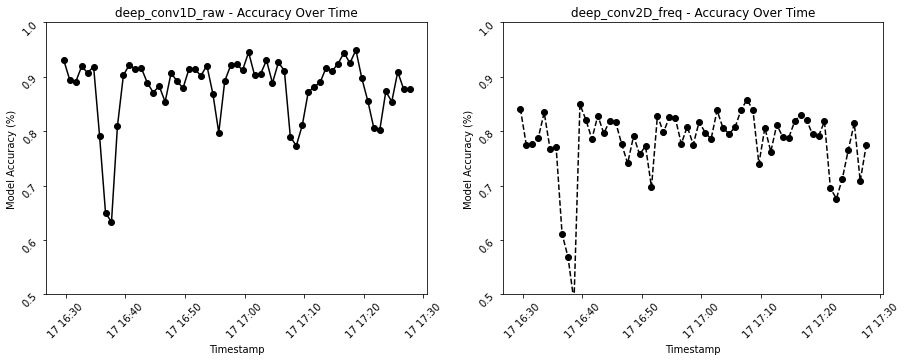

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(log_data1['Timestamp'], log_data1['model_accuracy'], marker='o', linestyle='-', color='k')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Model Accuracy (%)')
axs[0].set_title('deep_conv1D_raw - Accuracy Over Time')
axs[0].tick_params(rotation=45)
axs[0].set_ylim([0.5,1])

axs[1].plot(log_data2['Timestamp'], log_data2['model_accuracy'], marker='o', linestyle='--', color='k')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Model Accuracy (%)')
axs[1].set_title('deep_conv2D_freq - Accuracy Over Time')
axs[1].tick_params(rotation=45)
axs[1].set_ylim([0.5,1])

(0.0, 1.0)

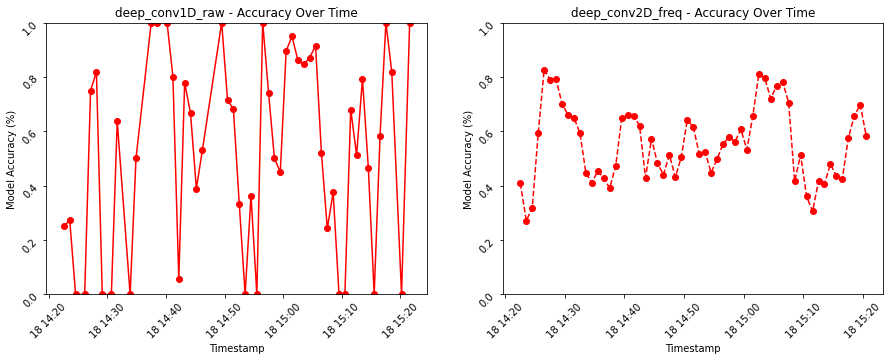

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(log_data3['Timestamp'], log_data3['model_accuracy'], marker='o', linestyle='-', color='r')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Model Accuracy (%)')
axs[0].set_title('deep_conv1D_raw - Accuracy Over Time')
axs[0].tick_params(rotation=45)
axs[0].set_ylim([0,1])

axs[1].plot(log_data4['Timestamp'], log_data4['model_accuracy'], marker='o', linestyle='--', color='r')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Model Accuracy (%)')
axs[1].set_title('deep_conv2D_freq - Accuracy Over Time')
axs[1].tick_params(rotation=45)
axs[1].set_ylim([0,1])

In [21]:

def plot_soak_test_info(log_data):
    # Criar uma figura com subplots
    fig, axs = plt.subplots(4, 2, figsize=(15, 13))
    #fig.suptitle('Soak-Tesk data analysis- Deep-Learning model- EEG', fontsize=16)
    
    # Plot 1 - Consumo de temperatura
    axs[0, 0].plot(log_data['Timestamp'], log_data['cpu_temperature'], marker='o', linestyle='-', color='g')
    axs[0, 0].set_xlabel('Timestamp')
    axs[0, 0].set_ylabel('Cpu Temperature (Cº)')
    axs[0, 0].set_title('Cpu Temperature over Time')
    axs[0, 0].tick_params(rotation=45)

    # Plot 2 - Uso da CPU
    axs[0, 1].plot(log_data['Timestamp'], log_data['cpu_usage'], marker='o', linestyle='-', color='g')
    axs[0, 1].set_xlabel('Timestamp')
    axs[0, 1].set_ylabel('CPU Usage (%)')
    axs[0, 1].set_title('CPU Usage Over Time')
    axs[0, 1].tick_params(rotation=45)

    # Plot 3 - Uso de Memória
    axs[1, 0].plot(log_data['Timestamp'], log_data['memory_usage'], marker='o', linestyle='-', color='g')
    axs[1, 0].set_xlabel('Timestamp')
    axs[1, 0].set_ylabel('Memory Usage (%)')
    axs[1, 0].set_title('Memory Usage Over Time')
    axs[1, 0].tick_params(rotation=45)

    # Plot 4 - Consumo de Disco
    axs[1, 1].plot(log_data['Timestamp'], log_data['disk_usage'], marker='o', linestyle='-', color='g')
    axs[1, 1].set_xlabel('Timestamp')
    axs[1, 1].set_ylabel('Disk Usage (bytes)')
    axs[1, 1].set_title('Disk Usage Over Time')
    axs[1, 1].tick_params(rotation=45)

    # Plot 5 - Uso da CPU (Preprocessing Latency)
    axs[2, 0].plot(log_data['Timestamp'], log_data['preprocessing_latency'], marker='o', linestyle='-', color='b')
    axs[2, 0].set_xlabel('Timestamp')
    axs[2, 0].set_ylabel('Preprocessing Latency (ms)')
    axs[2, 0].set_title('Preprocessing Latency Over Time')
    axs[2, 0].tick_params(rotation=45)

    # Plot 6 - Consumo em tempo do preprocesamento (Model Predict Latency)
    axs[2, 1].plot(log_data['Timestamp'], log_data['model_predict_latency'], marker='o', linestyle='-', color='b')
    axs[2, 1].set_xlabel('Timestamp')
    axs[2, 1].set_ylabel('Model Predict Latency (ms)')
    axs[2, 1].set_title('Model Predict Latency Over Time')
    axs[2, 1].tick_params(rotation=45)

    # Plot 7 - Uso de Memória (Model Accuracy)
    axs[3, 0].plot(log_data['Timestamp'], log_data['model_accuracy'], marker='o', linestyle='-', color='r')
    axs[3, 0].set_xlabel('Timestamp')
    axs[3, 0].set_ylabel('Model Accuracy (%)')
    axs[3, 0].set_title('Model Accuracy Over Time')
    axs[3, 0].tick_params(rotation=45)

    # Remover o subplot não utilizado
    fig.delaxes(axs[3, 1])

    # Ajustar o espaçamento entre subplots
    plt.tight_layout()

    # Exibir a figura
    plt.show()


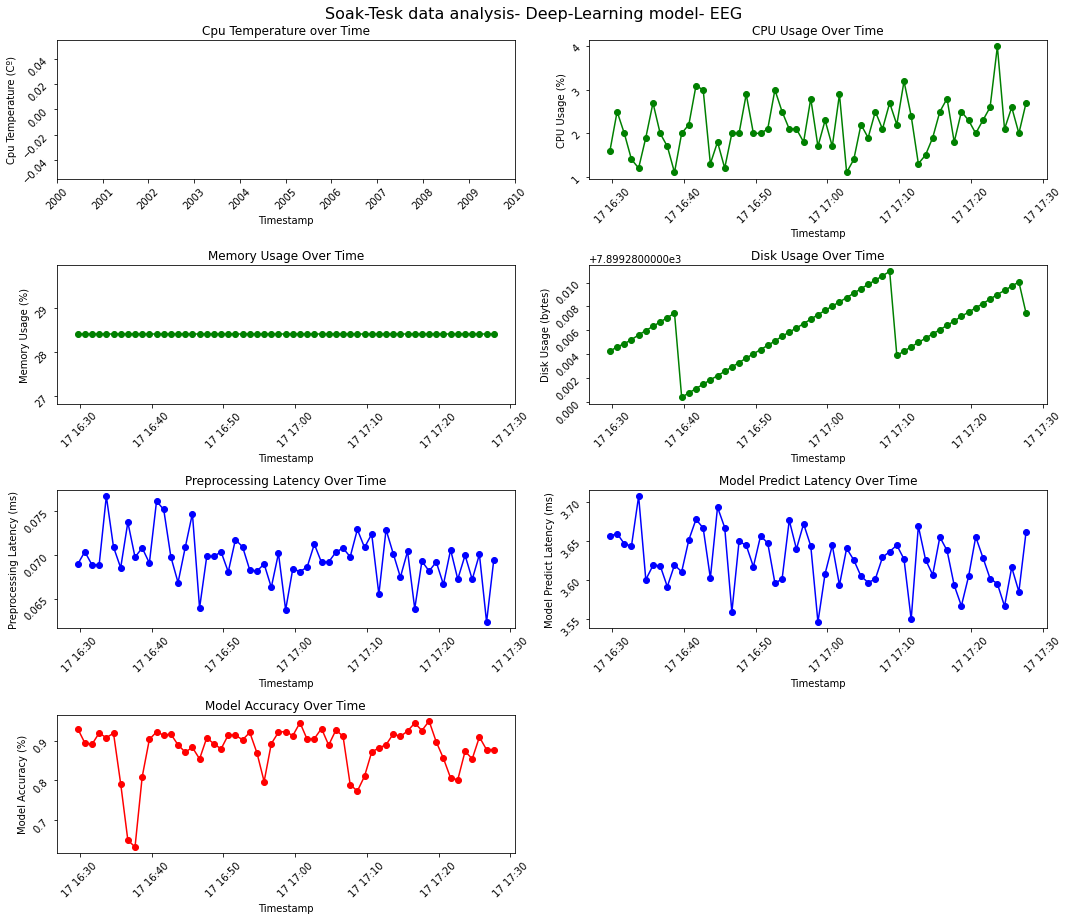

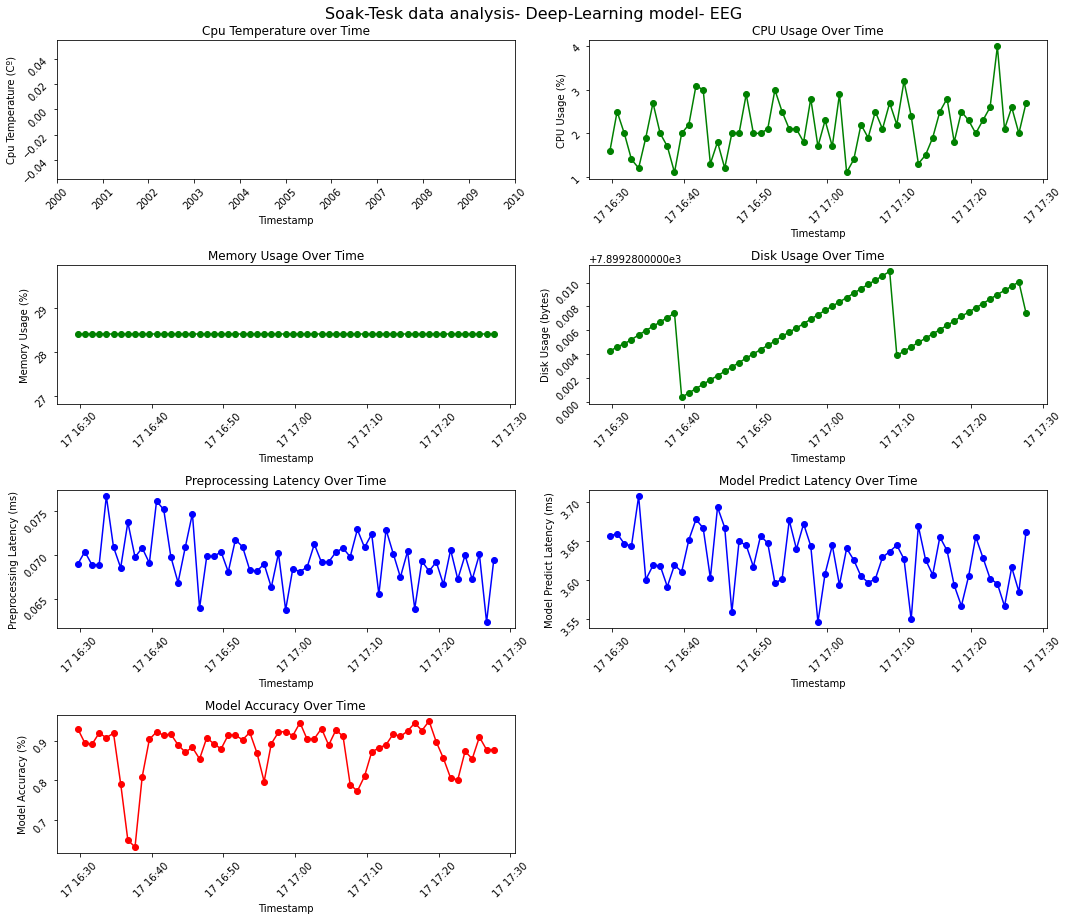

In [22]:
plot_soak_test_info(log_data1)
plot_soak_test_info(log_data2)